In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import corner
from lmfit import minimize, Parameters
from astropy.io import fits
from uncertainties import ufloat
import uncertainties.unumpy as upy

import os
import sys
magePath = '/Users/javieratoro/Desktop/proyecto 2024-2/'
linmixPath = '/Users/javieratoro/Desktop/linmix'
os.sys.path.append(magePath)
os.sys.path.append(linmixPath)
import linmix


In [2]:
print('MagE Resolution (km/s):', round(299792.458 / 4100))

MagE Resolution (km/s): 73


In [3]:
# Literature

def B20(tempx, tempy):
    Tx = np.linspace(0.0, 100, 500)
    if (tempx == 'TO2' and tempy == 'TN2') or (tempy == 'TO2' and tempx == 'TN2'):
        Ty = (Tx - 1.203) / 1.004
    if (tempx == 'TS3' and tempy == 'TO3') or (tempy == 'TS3' and tempx == 'TO3'):
        Ty = (1.795 * Tx) - 8.167
    if (tempx == 'TS3' and tempy == 'TN2') or (tempy == 'TS3' and tempx == 'TN2'):
        Ty = (1.522 * Tx) - 4.576
    return Tx/10, Ty/10

def G92(tempx, tempy):
    Tx = np.linspace(0.0, 10.0, 500)
    if (tempx == 'TS3' and tempy == 'TO3') or (tempy == 'TS3' and tempx == 'TO3'):
        Ty = (0.83 * Tx) + 0.17
    if (tempx == 'TO2' and tempy == 'TO3') or (tempy == 'TO2' and tempx == 'TO3'):
        Ty = (0.7 * Tx) + 0.3
    return Tx, Ty

def PM17(tempx, tempy):
    Tx = np.linspace(0.0, 10.0, 500)
    if (tempx == 'TS2' and tempy == 'TO2') or (tempy == 'TS2' and tempx == 'TO2'):
        Ty = (0.71 * Tx) + 0.12
    if (tempx == 'TS3' and tempy == 'TO3') or (tempy == 'TS3' and tempx == 'TO3'):
        Ty = (1.19 * Tx) + 0.32
    if (tempx == 'TO2' and tempy == 'TO3') or (tempy == 'TO2' and tempx == 'TO3'):
        Ty = 2 * Tx / (1 + (0.8 * Tx))
    if (tempx == 'TN2' and tempy == 'TO3') or (tempy == 'TN2' and tempx == 'TO3'):
        Ty = 1.85 * Tx / (1 + (0.72 * Tx))
    return Tx, Ty

def R21(tempx, tempy):
    Tx = np.linspace(0.0, 10.0, 500)
    if (tempx == 'TO3' and tempy == 'TN2') or (tempx == 'TN2' and tempy == 'TO3'):
        Ty = (0.79 * Tx) + 0.16
    if (tempx == 'TS3' and tempy == 'TN2') or (tempx == 'TN2' and tempy == 'TS3'):
        Ty = (0.68 * Tx) + 0.28
    if (tempx == 'TO2' and tempy == 'TN2') or (tempx == 'TN2' and tempy == 'TO2'):
        Ty = (0.45 * Tx) + 0.36
    if (tempx == 'TO3' and tempy == 'TS3') or (tempx == 'TS3' and tempy == 'TO3'):
        Ty = (Tx - 0.36) / 0.63
    return Tx, Ty

def PM17_den(density=100):
    Tx = np.linspace(0.1, 10.0, 500)
    num = 1.2 + (0.002 * density) + (4.2 / density)
    den = 0.08 + (Tx**-1) + (0.003 * density) + (2.5 / density)
    Ty = num / den
    return Tx, Ty

# Temden analysis from clouds

In [23]:
# Temperatures
temden_measured = pd.read_csv(magePath+'lines/ratios/temden_lines.csv')
tm_dict = {}
for key in temden_measured.keys():
    tm_dict[key] = temden_measured[key].to_numpy()

tm_dict = pd.DataFrame(tm_dict)

In [5]:
# Temperatures
temden_measured_or = pd.read_csv(magePath+'nava_data/analogs/results/metals/temden_measured_lstsq.csv')
tm_dict_or = {}
for key in temden_measured_or.keys():
    tm_dict_or[key] = temden_measured_or[key].to_numpy()

tm_dict_or = pd.DataFrame(tm_dict_or)

## Linear fit 

In [6]:
np.random.seed(999)

lm_o3s3 = linmix.LinMix(tm_dict['tOIII'],
                       tm_dict['tOIII_err'],
                       K=2)
lm_o3s3.run_mcmc(silent=True)

In [7]:
np.random.seed(999)

lm_o3o2 = linmix.LinMix(tm_dict['tOIII'], tm_dict['tOII'],
                       tm_dict['tOIII_err'], tm_dict['tOII_err'],
                       K=2)
lm_o3o2.run_mcmc(silent=True)

In [8]:
# alpha_o3s3 = np.mean(lm_o3s3.chain['alpha'])
# alpha_o3s3_std = np.std(lm_o3s3.chain['alpha'])
# beta_o3s3 = np.mean(lm_o3s3.chain['beta'])
# beta_o3s3_std = np.std(lm_o3s3.chain['beta'])
# sig_int_o3s3 = upy.sqrt(ufloat(np.mean(lm_o3s3.chain['sigsqr']),
#                                 np.std(lm_o3s3.chain['sigsqr'])))

alpha_o3o2 = np.mean(lm_o3o2.chain['alpha'])
alpha_o3o2_std = np.std(lm_o3o2.chain['alpha'])
beta_o3o2 = np.mean(lm_o3o2.chain['beta'])
beta_o3o2_std = np.std(lm_o3o2.chain['beta'])
sig_int_o3o2 = upy.sqrt(ufloat(np.mean(lm_o3o2.chain['sigsqr']),
                                np.std(lm_o3o2.chain['sigsqr'])))

# alpha_s3o2 = np.mean(lm_s3o2.chain['alpha'])
# alpha_s3o2_std = np.std(lm_s3o2.chain['alpha'])
# beta_s3o2 = np.mean(lm_s3o2.chain['beta'])
# beta_s3o2_std = np.std(lm_s3o2.chain['beta'])
# sig_int_s3o2 = upy.sqrt(ufloat(np.mean(lm_s3o2.chain['sigsqr']),
#                                 np.std(lm_s3o2.chain['sigsqr'])))

# Non-linear functional form

In [9]:
params_o2o3 = Parameters()

params_o2o3.add('u', value=2.0)
params_o2o3.add('v', value=0.8)

def residuals_o2o3(params_o2o3, x, data, uncertainty):
    
    u = params_o2o3['u']
    v = params_o2o3['v']
    
    x = tm_dict['tOIII']
    
    model = u / ((x**-1) + v)
    
    return (model - tm_dict['tOII']) / tm_dict['tOII_err']

In [10]:
np.random.seed(999)
out_fit_o2o3 = minimize(residuals_o2o3, params_o2o3, args=(1, 1, 1),
                       method='leastsq')
out_fit_o2o3.params

name,value,standard error,relative error,initial value,min,max,vary
u,1.51386024,1.64177729,(108.45%),2.0,-inf,inf,True
v,0.52065181,1.47723878,(283.73%),0.8,-inf,inf,True


# Quadratic

In [11]:
params_q_o2o3 = Parameters()

#params_q_o2o3.add('a0', value=-0.5, max=0.)
params_q_o2o3.add('a1', value=1.3, min=0.)
params_q_o2o3.add('a2', value=-0.2, max=0.)

def residuals_q_o2o3(params_q_o2o3, x, data, uncertainty):

    #a0 = params_q_o2o3['a0']
    a1 = params_q_o2o3['a1']
    a2 = params_q_o2o3['a2']

    x = tm_dict['tOIII']

    model = (a1 * x) + (a2 * (x**2))

    return (model - tm_dict['tOII']) / tm_dict['tOII_err']

In [12]:
np.random.seed(999)
out_fit_q_o2o3 = minimize(residuals_q_o2o3, params_q_o2o3, args=(1, 1, 1),
                       method='leastsq')
out_fit_q_o2o3.params

name,value,standard error,relative error,initial value,min,max,vary
a1,1.28885159,0.58696084,(45.54%),1.3,0.00000000,inf,True
a2,-0.29640991,0.48697387,(164.29%),-0.2,-inf,0.00000000,True


In [13]:
tm_dict

,Source,tOIII,tOIII_err,tNII,tNII_err,ne_OIII,ne_OIII_err,tOII,tOII_err,ne_OII,ne_OII_err,tOII_ne,tOII_ne_err,12_log_OH,12_log_OH_err,12_log_NH,12_log_NH_err,log_NO,log_NO_err
0,J0020+0030,1.111476,0.025362,0.900241,0.055703,288.694003,10.292574,0.963785,0.017051,275.070002,9.621260,0.970832,0.016519,8.348110,0.023729,7.123332,0.019978,-1.010691,0.014530
1,J0203+0035,1.147545,0.052294,0.928178,0.099501,341.611649,28.246223,0.823020,0.032435,302.191853,24.356087,0.835872,0.033503,8.436942,0.067249,7.407163,0.053013,-0.873506,0.038885
2,J0243+0111,1.114783,0.017304,1.382683,0.193200,73.074597,19.694802,1.360595,0.066096,70.571493,21.155603,1.362740,0.064259,8.197935,0.020626,6.303103,0.042745,-0.991335,0.030221
3,J0033+0017,1.159963,0.007688,1.944851,0.141191,126.770843,16.762068,1.379860,0.027713,127.609300,17.734430,1.378939,0.024267,8.172633,0.008501,6.249088,0.016189,-0.908403,0.011669
4,J2204+0058,1.241180,0.024907,1.862867,0.296177,166.829711,29.556916,1.090140,0.061283,163.325122,28.121312,1.091983,0.059090,8.122166,0.042556,6.453156,0.058122,-1.300730,0.041979
5,J2258+0056,1.334627,0.017441,1.238234,0.249063,58.755909,20.661634,1.696379,0.064131,54.716368,21.589649,1.701154,0.059916,7.966153,0.015025,6.038893,0.027860,-0.867077,0.019497
6,J2336-0042,1.067953,0.016836,0.914149,0.081010,171.505892,19.179133,1.196573,0.032398,175.430414,20.131432,1.193921,0.029683,8.168712,0.019645,6.630351,0.024918,-0.890135,0.017866
7,J0023-0948,1.415789,0.015750,0.965170,0.276962,134.156207,13.786051,1.166382,0.028037,133.048000,12.987911,1.167183,0.026692,7.955830,0.016358,6.051852,0.023578,-1.457091,0.017475
8,J0136-0037,1.319523,0.017599,0.665387,0.449747,80.481378,34.415933,1.134953,0.072270,81.861839,32.584216,1.133819,0.069028,8.173351,0.023549,5.815853,0.066277,-1.613218,0.048149


In [14]:
tm_dict_or

,galname,tOIII,tOIII_err,tOII,tOII_err,ne,ne_err,tNII,tNII_err,tSIII,tSIII_err
0,J0021,1.076119,0.029214,1.072518,0.056954,122.917556,41.878755,1.700578,0.208902,0.998901,0.055006
1,J0023,1.258878,0.014836,1.208751,0.098326,68.647074,48.312763,NaN,NaN,1.377480,0.114501
2,J0136,1.351864,0.034071,1.195509,0.096971,62.580802,42.159405,NaN,NaN,1.204947,0.103933
3,J0240,1.444660,0.022830,1.557913,0.245355,435.393283,165.385450,NaN,NaN,1.466728,0.151158
4,J0252,1.447556,0.055422,1.245592,0.116751,113.428195,110.060302,NaN,NaN,1.238834,0.245634
5,J0305,1.132970,0.030020,0.865832,0.055575,114.573100,112.662724,NaN,NaN,1.167110,0.096199
6,J0950,1.249013,0.035476,0.862784,0.101724,94.467874,50.581631,NaN,NaN,NaN,NaN
7,J1146,1.600214,0.033941,0.857413,0.029957,89.600235,38.167858,NaN,NaN,NaN,NaN
8,J1226,1.397537,0.008079,0.958486,0.051820,148.131662,67.762896,1.085032,0.148671,1.217956,0.096604
9,J1444,1.667119,0.020885,1.368851,0.163001,173.023057,52.454179,NaN,NaN,1.489616,0.202680


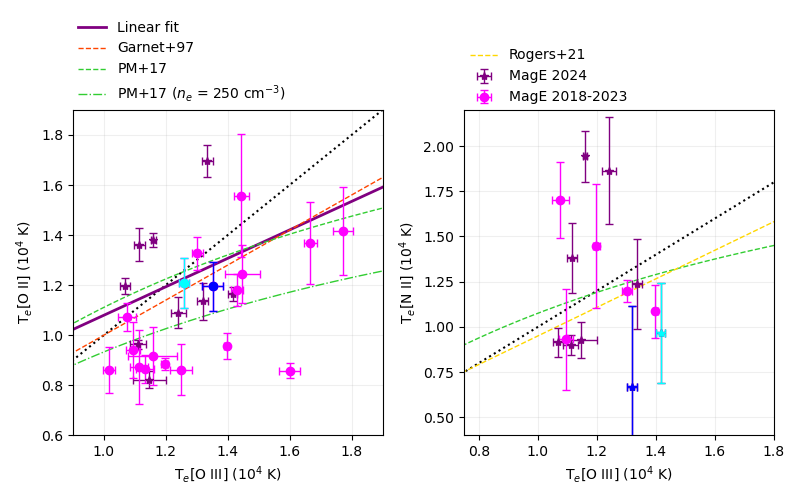

In [15]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((8, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axs = axs.flatten()

axs[0].errorbar(tm_dict['tOIII'], tm_dict['tOII'],
               xerr=tm_dict['tOIII_err'], yerr=tm_dict['tOII_err'],
               marker='*', markersize=6, capsize=3,
               ls='', elinewidth=1, color='purple', zorder=100)

axs[0].errorbar(tm_dict_or['tOIII'], tm_dict_or['tOII'],
               xerr=tm_dict_or['tOIII_err'], yerr=tm_dict_or['tOII_err'],
               marker='o', markersize=6, capsize=3,
               ls='', elinewidth=1, color='magenta', zorder=100)


for name, col in zip(['J0136', 'J0023'], ('blue', 'cyan')):
    axs[0].errorbar(tm_dict_or[tm_dict_or['galname'] == name]['tOIII'].values,
                    tm_dict_or[tm_dict_or['galname'] == name]['tOII'].values,
                    xerr=tm_dict_or[tm_dict_or['galname'] == name]['tOIII_err'].values,
                    yerr=tm_dict_or[tm_dict_or['galname'] == name]['tOII_err'].values,
                    marker='o', markersize=6, capsize=3,
                    ls='', elinewidth=1, color=col, zorder=100)
    axs[0].errorbar(tm_dict[tm_dict['Source'] == name]['tOIII'].values,
                    tm_dict[tm_dict['Source'] == name]['tOII'].values,
                    xerr=tm_dict[tm_dict['Source'] == name]['tOIII_err'].values,
                    yerr=tm_dict[tm_dict['Source'] == name]['tOII_err'].values,
                    marker='*', markersize=6, capsize=3,
                    ls='', elinewidth=1, color=col, zorder=110)

axs[0].plot(np.arange(0.5, 3.0, 0.1), np.arange(0.5, 3.0, 0.1),
            ls=':', color='black')
axs[0].plot(np.arange(0.5, 5.0, 0.1), alpha_o3o2 + (np.arange(0.5, 5.0, 0.1) * beta_o3o2),
              color='purple', lw=2, label='Linear fit')

axs[0].set_xlabel(r'T$_{e}$[O III] ($10^{4}$ K)')
axs[0].set_ylabel(r'T$_{e}$[O II] ($10^{4}$ K)')
axs[0].set_xlim(0.9, 1.9)
axs[0].set_ylim(0.6, 1.9)
axs[0].plot(G92('TO3', 'TO2')[0], G92('TO3', 'TO2')[1],
              ls='--', lw=1, color='orangered', label='Garnet+97')
axs[0].plot(PM17('TO3', 'TO2')[0], PM17('TO3', 'TO2')[1],
              ls='--', lw=1, label='PM+17', color='limegreen')
axs[0].plot(PM17_den(250)[0], PM17_den(250)[1],
              ls='-.', lw=1, color='limegreen', label='PM+17 ($n_{e}$ = 250 cm$^{-3}$)')

# axs[0].text(0.7, 1.7, s=r'$\sigma_{int} =$ '+str(round(upy.nominal_values(sig_int_o3o2)*10000))+' K', fontsize=15)
axs[0].legend(loc=(0.0, 1.0), frameon=False)


axs[1].errorbar(tm_dict['tOIII'], tm_dict['tNII'],
               xerr=tm_dict['tOIII_err'], yerr=tm_dict['tNII_err'],
               marker='*', markersize=6, capsize=3,
               ls='', elinewidth=1, color='purple', zorder=100,
               label='MagE 2024')
axs[1].errorbar(tm_dict_or['tOIII'], tm_dict_or['tNII'],
               xerr=tm_dict_or['tOIII_err'], yerr=tm_dict_or['tNII_err'],
               marker='o', markersize=6, capsize=3,
               ls='', elinewidth=1, color='magenta', zorder=100,
               label='MagE 2018-2023')

for name, col in zip(['J0136-0037', 'J0023-0948'], ('blue', 'cyan')):
    axs[1].errorbar(tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOIII'].values,
                    tm_dict_or[tm_dict_or['galname'] == name[:5]]['tNII'].values,
                    xerr=tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOIII_err'].values,
                    yerr=tm_dict_or[tm_dict_or['galname'] == name[:5]]['tNII_err'].values,
                    marker='o', markersize=6, capsize=3,
                    ls='', elinewidth=1, color=col, zorder=100)
    axs[1].errorbar(tm_dict[tm_dict['Source'] == name]['tOIII'].values,
                    tm_dict[tm_dict['Source'] == name]['tNII'].values,
                    xerr=tm_dict[tm_dict['Source'] == name]['tOIII_err'].values,
                    yerr=tm_dict[tm_dict['Source'] == name]['tNII_err'].values,
                    marker='*', markersize=6, capsize=3,
                    ls='', elinewidth=1, color=col, zorder=100)


axs[1].plot(np.arange(0.0, 3.0, 0.1), np.arange(0.0, 3.0, 0.1),
            ls=':', color='black')
axs[1].set_xlabel(r'T$_{e}$[O III] ($10^{4}$ K)')
axs[1].set_ylabel(r'T$_{e}$[N II] ($10^{4}$ K)')
axs[1].set_xlim(0.75, 1.8)
axs[1].set_ylim(0.4, 2.2)
axs[1].plot(PM17('TN2', 'TO3')[0], PM17('TN2', 'TO3')[1],
              ls='--', lw=1, color='limegreen')
axs[1].plot(R21('TN2', 'TO3')[0], R21('TN2', 'TO3')[1],
              ls='--', lw=1, color='gold', label='Rogers+21')
axs[1].legend(loc=(0.0, 1.0), frameon=False)

axs[0].grid(visible=True, alpha=0.2)
axs[1].grid(visible=True, alpha=0.2)
plt.tight_layout()
#fig.savefig(magePath+'analysis/chapter4/temp_relations.pdf', bbox_inches='tight')

In [16]:
tm_old = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/magE2024_master_au.csv')
tm_new = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/magE2024_master_Dcorr.csv')

print(tm_new['O2_7333_flux']/tm_old['O2_7333_flux'])
print(tm_new['O2_3727_flux']/tm_old['O2_3727_flux'])
# print(tm_new['O2_3727_flux']/tm_new2['O2_3727_flux'])
# print(np.log(tm_new['O2_3727_flux']/tm_old['O2_3727_flux'])/np.log(tm_new['O2_7333_flux']/tm_old['O2_7333_flux']))


0    2.035866
1    2.025744
2    1.490097
3    1.607573
4    1.496354
5    1.566164
6    1.475703
7    1.421131
8    1.164199
Name: O2_7333_flux, dtype: float64
0    6.032553
1    6.031415
2    2.711804
3    3.318695
4    2.817777
5    3.106358
6    2.646942
7    2.466822
8    1.529461
Name: O2_3727_flux, dtype: float64


In [17]:
print('corr:',tm_new['O2_7333_flux']/tm_new['O2_3727_flux'])
print('no corr:',tm_old['O2_7333_flux']/tm_old['O2_3727_flux'])


corr: 0    0.016963
1    0.017629
2    0.025070
3    0.028037
4    0.015986
5    0.034215
6    0.021620
7    0.023544
8    0.018007
dtype: float64
no corr: 0    0.050265
1    0.052488
2    0.045625
3    0.057879
4    0.030102
5    0.067863
6    0.038780
7    0.040869
8    0.023657
dtype: float64


In [18]:
tm_combined = pd.concat([temden_measured, temden_measured_or], ignore_index=True)

norm = plt.Normalize(vmin=np.min(tm_combined['tOII']), vmax=np.max(tm_combined['tOII']))
cmap = plt.cm.magma
color = cmap(norm(tm_combined['tOII']))

Text(0, 0.5, 'T$_{e}$[O II] ($10^{4}$ K)')

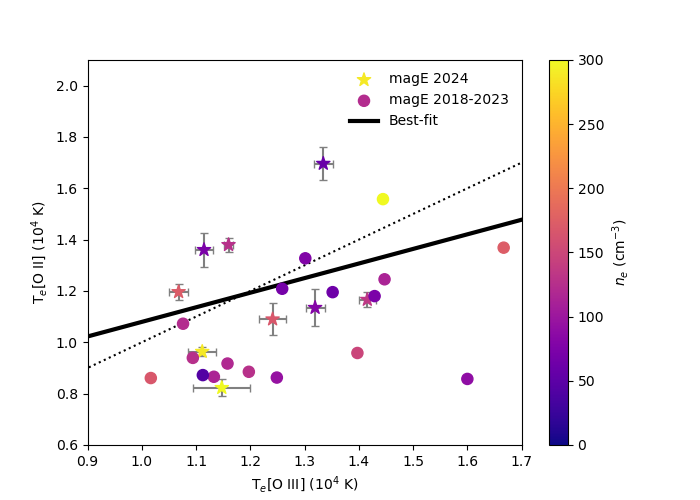

In [24]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches((7, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# for name, col in zip(['J0136-0037', 'J0023-0948'], ('blue', 'cyan')):
#     axs.errorbar(tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOIII'].values,
#                     tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOII'].values,
#                     xerr=tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOIII_err'].values,
#                     yerr=tm_dict_or[tm_dict_or['galname'] == name[:5]]['tOII_err'].values,
#                     marker='^', markersize=10, capsize=3,
#                     ls='', elinewidth=1,
#                     color=col,
#                     zorder=10)
#     axs.errorbar(tm_dict[tm_dict['Source'] == name]['tOIII'].values,
#                     tm_dict[tm_dict['Source'] == name]['tOII'].values,
#                     xerr=tm_dict[tm_dict['Source'] == name]['tOIII_err'].values,
#                     yerr=tm_dict[tm_dict['Source'] == name]['tOII_err'].values,
#                     marker='x', markersize=10, capsize=3,
#                     ls='', elinewidth=1,
#                     color=col,
#                     zorder=100)


for c, x, y, x_err, y_err in zip(color,tm_combined['tOIII'], tm_combined['tOII'], tm_combined['tOIII_err'], tm_combined['tOII_err']):
    axs.errorbar(x, y,
                xerr=x_err, yerr=y_err,
                marker='', markersize=12, capsize=3,
                ls='', ecolor='gray', color=c,
                markeredgecolor='white', zorder=5)

sc = axs.scatter(tm_dict['tOIII'], tm_dict['tOII'], marker='*',
                 s=100, c=tm_dict['ne_OIII'], vmin=0., vmax=300,
                 zorder=5, cmap='plasma', label='magE 2024')

axs.scatter(tm_dict_or['tOIII'], tm_dict_or['tOII'], marker='o',
            s=64, c=tm_dict_or['ne'], vmin=0., vmax=300, zorder=5,
            cmap='plasma', label='magE 2018-2023')

axs.plot(np.arange(0.5, 2.0, 0.1), np.arange(0.5, 2.0, 0.1),
            ls=':', color='black')
#axs[0, 0].plot(np.arange(0.5, 5.0, 0.1), u / ((np.arange(0.5, 5.0, 0.1)**-1) + v),
#              color=cz[1], lw=3, label='Best-fit')
plt.colorbar(sc, label=r'$n_{e}$ (cm$^{-3}$)')
axs.plot(np.arange(0.5, 5.0, 0.1), alpha_o3o2 + (np.arange(0.5, 5.0, 0.1) * beta_o3o2),
              color='black', lw=3, label='Best-fit')
axs.legend(frameon=False)
axs.set_xlim(0.9, 1.7)
axs.set_ylim(0.6, 2.1)
axs.set_xlabel(r'T$_{e}$[O III] ($10^{4}$ K)')
axs.set_ylabel(r'T$_{e}$[O II] ($10^{4}$ K)')

Text(0.7, 0.65, '$n_{e}$ = 300 cm$^{-3}$')

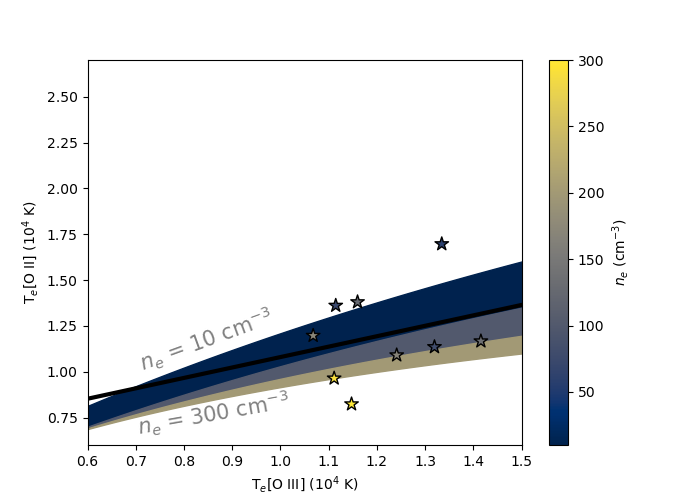

In [20]:
import matplotlib as mpl

# Select a color map
cmap = mpl.cm.cividis
dens_to_fill = np.array([10, 100, 200, 300])
normalize = mpl.colors.Normalize(vmin=np.min(dens_to_fill),
                                 vmax=np.max(dens_to_fill))

fig, axs = plt.subplots(1, 1)
fig.set_size_inches((7, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

norm = plt.Normalize(vmin=np.min(tm_dict['tOII']), vmax=np.max(tm_dict['tOII']))
color = cmap(norm(tm_dict['tOII']))

for c, x, y in zip(color,tm_dict['tOIII'], tm_dict['tOII']):
    axs.errorbar(x, y,
                #xerr=2*tOIII_error, yerr=2*tOII_error,
                marker='', markersize=12, capsize=3,
                ls='', ecolor='gray', color=c,
                    markeredgecolor='white', zorder=5)
    
sc = axs.scatter(tm_dict['tOIII'], tm_dict['tOII'],
                edgecolor='black',
                s=104, c=tm_dict['ne_OIII'], vmin=10.,
                vmax=300, zorder=10, cmap='cividis', marker='*')
#axs.plot(np.arange(0.5, 2.0, 0.1), np.arange(0.5, 2.0, 0.1),
#            ls=':', color='black')
plt.colorbar(sc, label=r'$n_{e}$ (cm$^{-3}$)')
axs.plot(np.arange(0.5, 5.0, 0.1), alpha_o3o2 + (np.arange(0.5, 5.0, 0.1) * beta_o3o2),
              color='black', lw=3, label='Best-fit')


#axs.fill_between(PM17_den(0)[0], PM17_den(0)[1], PM17_den(10)[1])x

for i in range(len(dens_to_fill) - 1):
    axs.fill_between(PM17_den(dens_to_fill[i])[0],
                     PM17_den(dens_to_fill[i])[1], PM17_den(dens_to_fill[i+1])[1],
                     color=cmap(normalize(dens_to_fill[i])), zorder=0)

axs.set_xlim(0.6, 1.5)
axs.set_ylim(0.6, 2.7)
axs.set_xlabel(r'T$_{e}$[O III] ($10^{4}$ K)')
axs.set_ylabel(r'T$_{e}$[O II] ($10^{4}$ K)')

axs.text(0.7, 1.0, r'$n_{e}$ = 10 cm$^{-3}$', rotation=20, fontsize=15, alpha=0.5)
axs.text(0.7, 0.65, r'$n_{e}$ = 300 cm$^{-3}$', rotation=10, fontsize=15, alpha=0.5)
#fig.savefig('./chapter5/temp_dens_dependence.pdf', bbox_inches='tight')

In [21]:
# SDSS local galaxies
izotov = fits.open(magePath+'nava_data/analogs/analysis/Izotov_2006.fits')[1].data

# Local HII regions Berg
berg1 = fits.open(magePath+'nava_data/analogs/analysis/tableB1.fits')[1].data
berg2 = fits.open(magePath+'nava_data/analogs/analysis/tableB2.fits')[1].data
berg3 = fits.open(magePath+'nava_data/analogs/analysis/tableB3.fits')[1].data

abun_mes = pd.read_csv(magePath+'nava_data/analogs/results/metals/abundance_measured_final.csv')
OH_error = np.array(list(zip(abun_mes['log_OH'] - abun_mes['log_OH_16'],
                             abun_mes['log_OH_84'] - abun_mes['log_OH']))).T

NO_error = np.array(list(zip(abun_mes['log_NO'] - abun_mes['log_NO_16'],
                             abun_mes['log_NO_84'] - abun_mes['log_NO']))).T


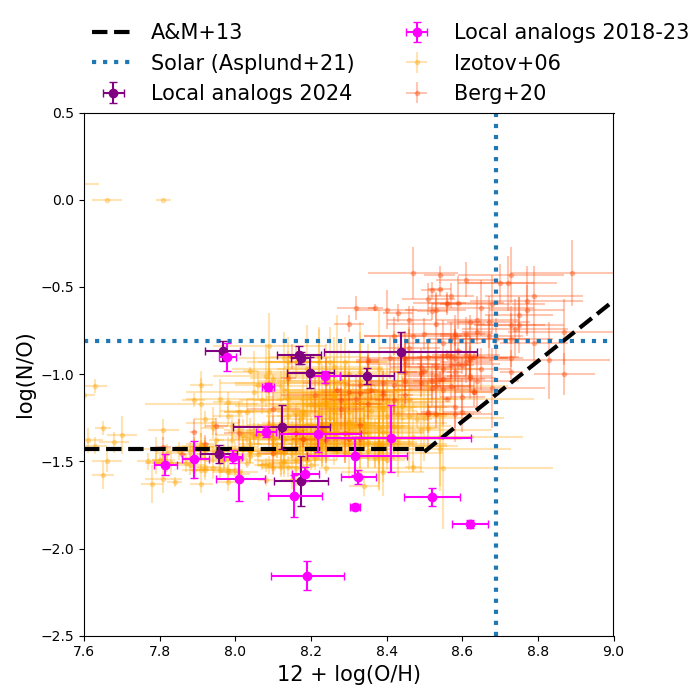

In [22]:
fig = plt.figure()

fig.set_size_inches((7, 7))
plt.errorbar(tm_dict['12_log_OH'], tm_dict['log_NO'],
            xerr=3*tm_dict['12_log_OH_err'], yerr=3*tm_dict['log_NO_err'],
            fmt='o', ls='', color='purple',
             markersize=6, capsize=3, zorder=5, label='Local analogs 2024')

plt.errorbar(abun_mes['log_OH'], abun_mes['log_NO'],
            xerr=3*OH_error, yerr=3*NO_error,
            fmt='o', ls='', color='magenta',
            markersize=6, capsize=3, zorder=5, label='Local analogs 2018-23')

plt.errorbar(izotov['12+logO/H'], izotov['logN/O'],
            xerr=izotov['e_12+logO/H'], yerr=izotov['e_logN/O'],
            zorder=0, alpha=0.3, ls='', fmt='.',
             color='orange', label='Izotov+06')

plt.errorbar(berg1['log(O/H)'], berg1['log(N/O)'],
            xerr=berg1['e_log(O/H)'], yerr=berg1['e_log(N/O)'],
            zorder=0, alpha=0.3, ls='', fmt='.',
             color='orangered', label='Berg+20')
plt.errorbar(berg2['log(O/H)'], berg2['log(N/O)'],
            xerr=berg2['e_log(O/H)'], yerr=berg2['e_log(N/O)'],
            zorder=0, alpha=0.3, ls='', fmt='.',
             color='orangered')
plt.errorbar(berg3['log(O/H)'], berg3['log(N/O)'],
            xerr=berg3['e_log(O/H)'], yerr=berg3['e_log(N/O)'],
            zorder=0, alpha=0.3, ls='', fmt='.',
             color='orangered')

# for name, col, i in zip(['J0023-0948', 'J0136-0037'], ('blue', 'cyan'), [1, 2]):
#     plt.scatter(abun_mes[abun_mes['galname'] == name[:5]]['log_OH'].values,
#                     abun_mes[abun_mes['galname'] == name[:5]]['log_NO'].values,
#                     marker='o',
#                     ls='', color=col, zorder=100)
#     plt.scatter(tm_dict[tm_dict['Source'] == name]['12_log_OH'].values,
#                     tm_dict[tm_dict['Source'] == name]['log_NO'].values,
#                     marker='*',
#                     ls='', color=col, zorder=100)

plt.plot(np.arange(7.6, 8.5, 0.1), -1.43 * np.ones(10), ls='--', lw=3, color='black', label='A&M+13')
plt.plot(np.arange(8.5, 9.1, 0.1), (1.73 * np.arange(8.5, 9.1, 0.1)) - 16.15, ls='--', lw=3, color='black')

plt.axhline(-0.809, ls=':', lw=3, label='Solar (Asplund+21)')
plt.axvline(8.69, ls=':', lw=3)

plt.xlabel('12 + log(O/H)', fontsize=15)
plt.ylabel('log(N/O)', fontsize=15)
plt.xlim(7.6, 9.0)
plt.ylim(-2.5, 0.5)
plt.legend(ncols=2, loc=(0.0, 1.0), fontsize=15, frameon=False)
plt.tight_layout()
# plt.savefig(magePath+'analysis/chapter5/NO_ratio.pdf', bbox_inches='tight');

# lnmix

In [249]:
ratios = pd.read_csv(magePath + 'lines/magE2024_lines_ratios.csv')
tm_dict_or2 = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/analogs/results/metals/abundance_measured_final.csv')
tm_dict = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/ratios/temden_lines.csv')

ratios = ratios[:-2]
# tm_dict = tm_dict[:-2]

In [250]:
tm_combined_or = tm_dict_or.merge(tm_dict_or2, on='galname')
tm_combined_or['log_OH']

0     8.237354
1     8.081119
2     8.154166
3     7.978260
4     8.010618
5     8.317100
6     8.620668
7     8.190126
8     8.184518
9     7.890831
10    8.315543
11    8.219954
12    8.520784
13    8.325568
14    8.412357
15    8.085254
16    7.992826
17    7.814269
Name: log_OH, dtype: float64

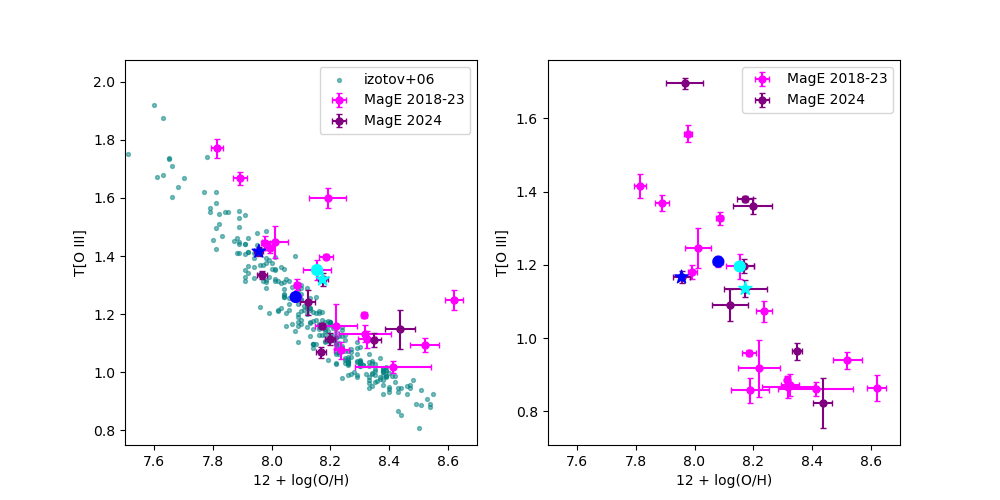

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].errorbar(tm_combined_or['log_OH'], tm_combined_or['tOIII'],
             xerr =(tm_combined_or['log_OH_84'].values - tm_combined_or['log_OH_16'].values),
             yerr= tm_combined_or['tOIII_err'], ms=5,
            ls='', marker='o', capsize=2, color='magenta', label='MagE 2018-23')

axs[0].errorbar(tm_dict['12_log_OH'], tm_dict['tOIII'],
             tm_dict['12_log_OH_err'], tm_dict['tOIII_err'], ms=5,
            ls='', marker='o', capsize=2, color='purple', label='MagE 2024')

axs[0].scatter(izotov['12+logO/H'], izotov['Te'], color='teal', alpha=0.5,
            s=8, label='izotov+06')


for name, col, i in zip(['J0023-0948', 'J0136-0037'], ('blue', 'cyan'), [1, 2]):
    axs[0].scatter(tm_combined_or[tm_combined_or['galname'] == name[:5]]['log_OH'].values,
                    tm_combined_or[tm_combined_or['galname'] == name[:5]]['tOIII'].values,
                    marker='o', s=60,
                    ls='', color=col, zorder=100)
    axs[0].scatter(tm_dict[tm_dict['Source'] == name]['12_log_OH'].values,
                    tm_dict[tm_dict['Source'] == name]['tOIII'].values,
                    marker='*', s=100,
                    ls='', color=col, zorder=100)
axs[0].set_xlim(7.5, 8.7)
axs[0].set_xlabel('12 + log(O/H)')
axs[0].set_ylabel('T[O III]')
axs[0].legend()

axs[1].errorbar(tm_combined_or['log_OH'], tm_combined_or['tOII'],
             xerr =(tm_combined_or['log_OH_84'].values - tm_combined_or['log_OH_16'].values),
             yerr= tm_combined_or['tOIII_err'], ms=5,
            ls='', marker='o', capsize=2, color='magenta', label='MagE 2018-23')

axs[1].errorbar(tm_dict['12_log_OH'], tm_dict['tOII'],
             tm_dict['12_log_OH_err'], tm_dict['tOII_err'], ms=5,
            ls='', marker='o', capsize=2, color='purple', label='MagE 2024')


for name, col, i in zip(['J0023-0948', 'J0136-0037'], ('blue', 'cyan'), [1, 2]):
    axs[1].scatter(tm_combined_or[tm_combined_or['galname'] == name[:5]]['log_OH'].values,
                    tm_combined_or[tm_combined_or['galname'] == name[:5]]['tOII'].values,
                    marker='o', s=60,
                    ls='', color=col, zorder=100)
    axs[1].scatter(tm_dict[tm_dict['Source'] == name]['12_log_OH'].values,
                    tm_dict[tm_dict['Source'] == name]['tOII'].values,
                    marker='*', s=100,
                    ls='', color=col, zorder=100)
axs[1].set_xlim(7.5, 8.7)
axs[1].set_xlabel('12 + log(O/H)')
axs[1].set_ylabel('T[O III]')
axs[1].legend()

In [214]:
seed = np.random.seed(999)


lm_n2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['N2'],
                         tm_dict['12_log_OH_err'], ratios['N2'], parallelize=True, seed=seed)
lm_n2.run_mcmc(silent=True)



lm_o3n2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['O3N2'],
                            tm_dict['12_log_OH_err'], ratios['O3N2_ERR'], parallelize=True, seed=seed)
lm_o3n2.run_mcmc(silent=True)



lm_o3o2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['O3O2'],
                            tm_dict['12_log_OH_err'], ratios['O3O2_ERR'], parallelize=True, seed=seed)
lm_o3o2.run_mcmc(silent=True)



lm_ne3o2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['Ne3O2'],
                             tm_dict['12_log_OH_err'], ratios['Ne3O2_ERR'], parallelize=True, seed=seed)
lm_ne3o2.run_mcmc(silent=True)



lm_s2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['S2'],
                            tm_dict['12_log_OH_err'], ratios['S2_ERR'], parallelize=True, seed=seed)
lm_s2.run_mcmc(silent=True)



lm_o3s2 = linmix.LinMix(tm_dict['12_log_OH'], ratios['O3S2'],
                            tm_dict['12_log_OH_err'], ratios['O3S2_ERR'], parallelize=True, seed=seed)
lm_o3s2.run_mcmc(silent=True)

In [215]:
slope_N2, int_N2 = np.mean(lm_n2.chain['beta']), np.mean(lm_n2.chain['alpha'])
slope_O3N2, int_O3N2 = np.mean(lm_o3n2.chain['beta']), np.mean(lm_o3n2.chain['alpha'])
slope_N2, int_N2 = np.mean(lm_n2.chain['beta']), np.mean(lm_n2.chain['alpha'])
slope_O3N2, int_O3N2 = np.mean(lm_o3n2.chain['beta']), np.mean(lm_o3n2.chain['alpha'])
slope_O3O2, int_O3O2 = np.mean(lm_o3o2.chain['beta']), np.mean(lm_o3o2.chain['alpha'])
slope_Ne3O2, int_Ne3O2 = np.mean(lm_ne3o2.chain['beta']), np.mean(lm_ne3o2.chain['alpha'])
slope_S2, int_S2 = np.mean(lm_s2.chain['beta']), np.mean(lm_s2.chain['alpha'])
slope_O3S2, int_O3S2 = np.mean(lm_o3s2.chain['beta']), np.mean(lm_o3s2.chain['alpha'])

In [216]:
tm_dict['12_log_OH']

0    8.348110
1    8.436942
2    8.197935
3    8.172633
4    8.122166
5    7.966153
6    8.168712
Name: 12_log_OH, dtype: float64

In [217]:


mask1 = (tm_dict['12_log_OH'] <= 8.0)
mask2 = (tm_dict['12_log_OH'] > 8.0) & (tm_dict['12_log_OH'] <= 8.15)
mask3 = (tm_dict['12_log_OH'] > 8.15) & (tm_dict['12_log_OH'] <= 8.25)
mask4 = (tm_dict['12_log_OH'] > 8.25)

def binning(values, errors, binstat=False, OH=False):
    masks = [mask1, mask2, mask3, mask4]
    bins = []
    errors_ = []
    sigmas = []

    for i, mask in enumerate(masks):
        if np.sum(mask) == 0:  # Handle empty masks
            raise ValueError(f"Mask {i + 1} contains no True values.")

        if OH:
            bin_mean = np.mean(values[mask])
            bins.append(bin_mean)
            errors_.append(bin_mean - np.mean(errors[mask]))
        else:
            uvalues = upy.uarray(values[mask], errors[mask])
            bin_mean = np.mean(uvalues)
            bins.append(bin_mean.nominal_value)
            sigmas.append(bin_mean.std_dev)

    if binstat:
        return upy.uarray(bins, sigmas)

    if OH:
        total_bin = upy.uarray(
            bins,
            [np.mean(errors)]
        )
    else:
        total_bin = upy.uarray(bins, sigmas)

    return total_bin

binstat=False
bin_OH = binning(tm_dict['12_log_OH'], tm_dict['12_log_OH_err'],
                 binstat=binstat, OH=True)
bin_N2 = binning(ratios['N2'], ratios['N2_ERR'], binstat=binstat)
bin_R2 = binning(ratios['R2'], ratios['R2_ERR'], binstat=binstat)
bin_R3 = binning(ratios['R3'], ratios['R3_ERR'], binstat=binstat)
bin_R23 = binning(ratios['R23'], ratios['R23_ERR'], binstat=binstat)
bin_O3N2 = binning(ratios['O3N2'], ratios['O3N2_ERR'], binstat=binstat)
bin_R3N2 = binning(ratios['R3N2'], ratios['R3N2_ERR'], binstat=binstat)
bin_N2O2 = binning(ratios['N2O2'], ratios['N2O2_ERR'], binstat=binstat)
bin_O3O2 = binning(ratios['O32'], ratios['O32_ERR'], binstat=binstat)
bin_Ne3O2 = binning(ratios['Ne3O2'], ratios['Ne3O2_ERR'], binstat=binstat)
bin_S2 = binning(ratios['S2'], ratios['S2_ERR'], binstat=binstat)
bin_O3S2 = binning(ratios['O3S2'], ratios['O3S2_ERR'], binstat=binstat)
bin_N2S2 = binning(ratios['N2S2'], ratios['N2S2_ERR'], binstat=binstat)

In [218]:
def denicolo2002_N2(log_OH_12):
    N2 = (log_OH_12 - 9.12) / 0.73
    return N2


def tremonti2004_R23(R23):
    log_OH_12 = 9.185 - (0.313 * R23) - (0.264 * (R23**2)) - (0.321 * (R23**3)) 
    return log_OH_12


def pettini_pagel2004_O3N2(log_OH_12):
    O3N2 = - (log_OH_12 - 8.73) / 0.32
    return O3N2


def pettini_pagel2004_N2(N2):
    log_OH_12 = 9.37 + (2.03 * N2) + (1.26 * (N2**2)) + (0.32 * (N2**3))
    return log_OH_12


def nagao2006(log_OH_12, ratio='asd'):
    if ratio == 'R23':
        b0 = 1.2299
        b1 = -4.1926
        b2 = 1.0246
        b3 = -0.063169
    if ratio == 'N2':
        b0 = 96.641
        b1 = -39.941
        b2 = 5.2227
        b3 = -0.22040
    if ratio == 'R3N2':
        b0 = -232.18
        b1 = 84.423
        b2 = -9.9330
        b3 = 0.37941
    if ratio == 'N2O2':
        b0 = -128.94
        b1 = 48.818
        b2 = -6.2759
        b3 = 0.27101
    if ratio == 'O3O2':
        b0 = -1.4089
        b1 = 1.3745
        b2 = -0.14359
        b3 = 0
    return b0 + (b1 * log_OH_12) + (b2 * (log_OH_12**2)) + (b3 * (log_OH_12**3))

def maiolino2008(log_OH_12, ratio='asd'):
    x = (log_OH_12 - 8.69)
    if ratio == 'R23':
        c0 = 0.7462
        c1 = -0.7149
        c2 = -0.9401
        c3 = -0.6154
        c4 = -0.2524
    if ratio == 'N2':
        c0 = -0.7732
        c1 = 1.2357
        c2 = -0.2811
        c3 = -0.7201
        c4 = -0.3330
    if ratio == 'R3':
        c0 = 0.1549
        c1 = -1.5031
        c2 = -0.9790
        c3 = -0.0297
        c4 = 0.0
    if ratio == 'O3O2':
        c0 = -0.2839
        c1 = -1.3881
        c2 = -0.3172
        c3 = 0.0
        c4 = 0.0
    if ratio == 'R2':
        c0 = 0.5603
        c1 = 0.0450
        c2 = -1.8017
        c3 = -1.8434
        c4 = -0.6549
    if ratio == 'R3N2':
        c0 = 0.4520
        c1 = -2.6096
        c2 = -0.7170
        c3 = 0.1347
        c4 = 0.0
    if ratio == 'Ne3O2':
        c0 = -1.2608
        c1 = -1.0861
        c2 = -0.1470
        c3 = 0.0
        c4 = 0.0
    return c0 + (c1 * x) + (c2 * (x**2)) + (c3 * (x**3)) + (c4 * (x**4))


def marino2013_N2(log_OH_12):
    N2 = (log_OH_12 - 8.743) / 0.462
    return N2


def marino2013_O3N2(log_OH_12):
    O3N2 = - (log_OH_12 - 8.533) / 0.214
    return O3N2


def curti2020(log_OH_12, ratio='asd'):
    x = (log_OH_12 - 8.69)
    if ratio == 'R2':
        c0 = 0.435
        c1 = -1.362
        c2 = -5.655
        c3 = -4.851
        c4 = -0.478
        c5 = 0.736
    if ratio == 'R3':
        c0 = -0.277
        c1 = -3.549
        c2 = -3.593
        c3 = -0.981
        c4 = 0.0
        c5 = 0.0
    if ratio == 'O3O2':
        c0 = -0.691
        c1 = -2.944
        c2 = -1.308
        c3 = 0.0
        c4 = 0.0
        c5 = 0.0
    if ratio == 'R23':
        c0 = 0.527
        c1 = -1.569
        c2 = -1.652
        c3 = -0.421
        c4 = 0.0
        c5 = 0.0
    if ratio == 'N2':
        c0 = -0.489
        c1 = 1.513
        c2 = -2.554
        c3 = -5.293
        c4 = -2.867
        c5 = 0.0
    if ratio == 'O3N2':
        c0 = 0.281
        c1 = -4.765
        c2 = -2.268
        c3 = 0.0
        c4 = 0.0
        c5 = 0.0
    if ratio == 'S2':
        c0 = -0.442
        c1 = -0.360
        c2 = -6.271
        c3 = -8.339
        c4 = -3.559
        c5 = 0.0
    if ratio == 'O3S2':
        c0 = 0.191
        c1 = -4.292
        c2 = -2.538
        c3 = 0.053
        c4 = 0.332
        c5 = 0.0
    return c0 + (c1 * x) + (c2 * (x**2)) + (c3 * (x**3)) + (c4 * (x**4)) + (c5 * (x**5))

def sanders2021(log_OH_12, ratio='asd'):
    x = (log_OH_12 - 8.69)
    if ratio == 'R3':
        c0 = -0.143
        c1 = -3.16
        c2 = -4.06
        c3 = -1.49
    if ratio == 'R2':
        c0 = 0.27
        c1 = -0.452
        c2 = -0.52
        c3 = 0.0831
    if ratio == 'O3O2':
        c0 = -0.413
        c1 = -2.7
        c2 = -3.52
        c3 = -1.55
    if ratio == 'R23':
        c0 = 0.469
        c1 = -1.51
        c2 = -1.75
        c3 = -0.508
    if ratio == 'N2':
        c0 = -0.606
        c1 = 1.28
        c2 = -0.435
        c3 = -0.485
    if ratio == 'O3N2':
        c0 = 0.461
        c1 = -4.40
        c2 = -3.37
        c3 = -0.761
    return c0 + (c1 * x) + (c2 * (x**2)) + (c3 * (x**3))

In [223]:
log_OH_tp = np.linspace(7.4, 9.0, 1000)
N2_tp = np.linspace(-3.5, 0.1, 1000)
R3_tp = np.linspace(0.2, 1.3, 1000)
R23_tp = np.linspace(0.4, 1.3, 1000)
O3N2_tp = np.linspace(1, 4, 1000)
O3O2_tp = np.linspace(0, 1.5, 1000)
Ne3O2_tp = np.linspace(-2.0, 0.5, 1000)
S2_tp = np.linspace(-2.0, -0.5, 1000)
O3S2_tp = np.linspace(1.0, 2.6, 1000)

def linear(x, a0, a1):
    return a0 + (a1 * x)

def poly2(x, a0, a1, a2):
    t0 = a0
    t1 = a1 * x
    t2 = a2 * (x**2)
    return t0 + t1 + t2


In [287]:
tm_dict = tm_dict[:-2]

In [332]:
metals = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/metals_lines.csv')
metals.columns

Index(['Source', '12_log_OH', '12_log_OH_err', '12_log_NH', '12_log_NH_err',
       'log_NO', 'log_NO_err', 'N2', 'N2_err', 'R3', 'R3_err', 'R2', 'R2_err',
       'R23', 'R23_err', 'O3N2', 'O3N2_err', 'R3N2', 'R3N2_err', 'N2O2',
       'N2O2_err', 'O3O2', 'O3O2_err', 'S2', 'S2_err', 'O3S2', 'O3S2_err',
       'N2S2', 'N2S2_err'],
      dtype='object')

In [337]:
em_lines = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/em_lines_final.csv')
Ne3O2 = upy.log10(upy.uarray(em_lines['[NeIII]3868'], em_lines['[NeIII]3868_err'])/ (upy.uarray(em_lines['[OII]3726'], em_lines['[OII]3726_err']) \
                + upy.uarray(em_lines['[OII]3729'], em_lines['[OII]3729_err'])))

In [340]:
upy.nominal_values(Ne3O2)

array([-0.61863672, -0.51602819, -0.35111612, -0.023303  , -0.27239376,
       -0.57487122, -0.56821659, -0.12196857, -0.22379735,  0.10387744,
       -0.24465955, -0.42756115, -0.74221806, -0.69436284, -0.60754087,
       -0.36043579, -0.2326204 , -0.18249653])

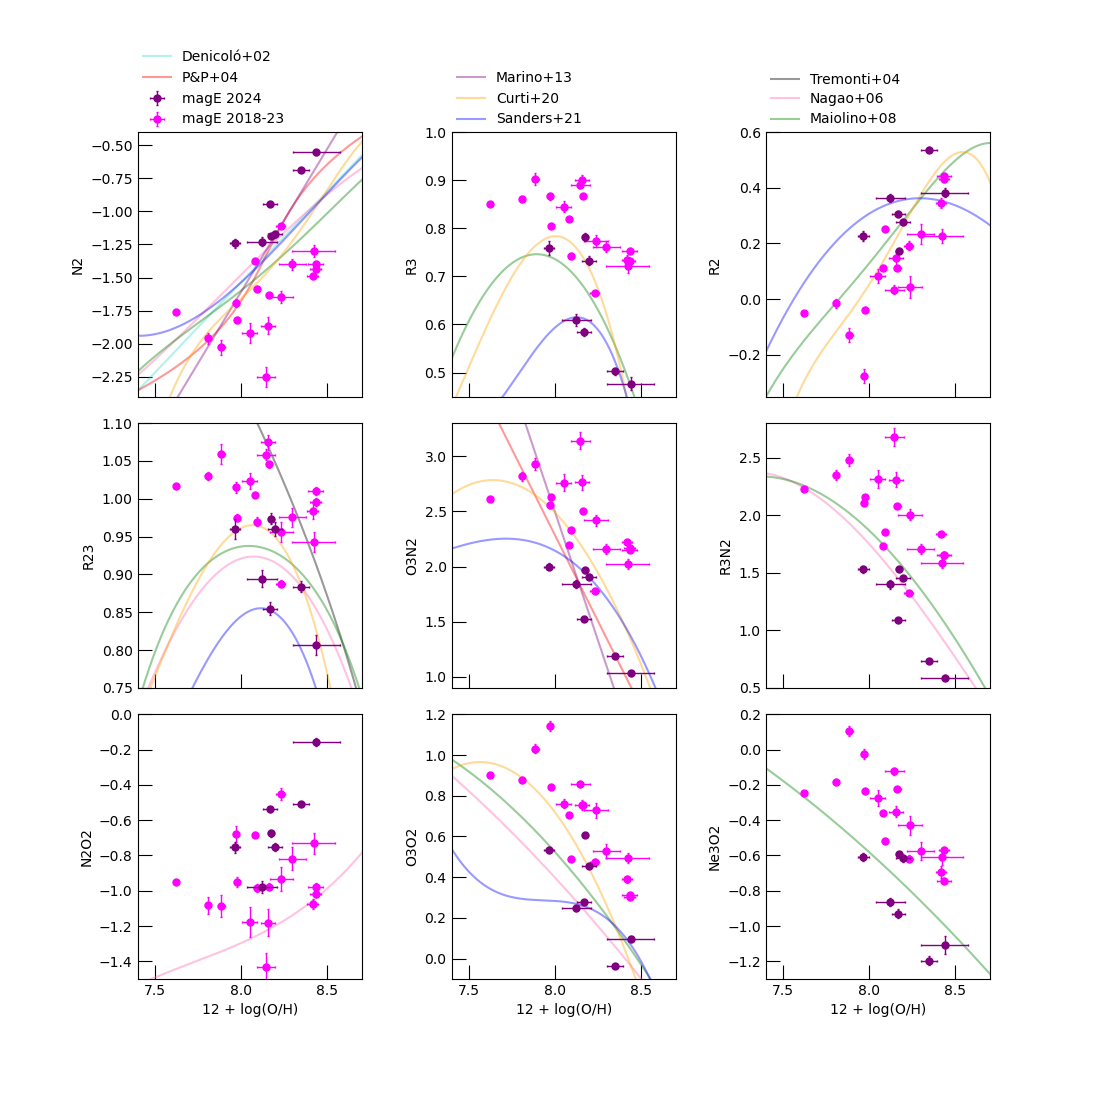

In [377]:
fig, axs = plt.subplots(3, 3, sharex=True)
fig.set_size_inches((11, 11))
fig.subplots_adjust(wspace=0.4, hspace=0.1)

# ===========================================================================================================
# N2 Ratio
# ===========================================================================================================
c = ['red', 'cyan', 'purple']
axs[0, 0].errorbar(tm_dict['12_log_OH'], ratios['N2'], xerr=2*tm_dict['12_log_OH_err'],
                   yerr=5*ratios['N2_ERR'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color='purple',
                   zorder=90, label='magE 2024')

axs[0, 0].errorbar(metals['12_log_OH'], metals['N2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['N2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90, label='magE 2018-23')
# for name, col in zip(['J0023-0948', 'J0136-0037'], ('blue', 'cyan')):
#     print(tm_dict[tm_dict['Source'] == name]['12_log_OH'])
#     print(ratios[ratios['ID'] == name]['N2'])
#     axs[0, 0].scatter(tm_dict[tm_dict['Source'] == name]['12_log_OH'].values,
#                     ratios[ratios['ID'] == name]['N2'].values,
#                     marker='o', s=8,
#                     color=col, zorder=100)
#     axs[0, 0].scatter(tm_combined_or[tm_combined_or['galname'] == name[:5]]['log_OH'].values,
#                     ratios[ratios['ID'] == name]['N2'].values,
#                     marker='*', s=8,
#                     color=col, zorder=100)
# Relations
axs[0, 0].plot(log_OH_tp, denicolo2002_N2(log_OH_tp), label='Denicoló+02', color='turquoise', alpha=0.4)
axs[0, 0].plot(pettini_pagel2004_N2(N2_tp), N2_tp,
               label='P&P+04', color='red', alpha=0.4)
axs[0, 0].plot(log_OH_tp, nagao2006(log_OH_tp, 'N2'), color='hotpink', alpha=0.4)
axs[0, 0].plot(log_OH_tp, maiolino2008(log_OH_tp, 'N2'), color='green', alpha=0.4)
axs[0, 0].plot(log_OH_tp, marino2013_N2(log_OH_tp), color='purple', alpha=0.4)
axs[0, 0].plot(log_OH_tp, curti2020(log_OH_tp, 'N2'), color='orange', alpha=0.4)
axs[0, 0].plot(log_OH_tp, sanders2021(log_OH_tp, 'N2'), color='blue', alpha=0.4)
axs[0, 0].set_ylabel('N2')

# ===========================================================================================================
# R3 Ratio
# ===========================================================================================================

axs[0, 1].errorbar(tm_dict['12_log_OH'], upy.nominal_values(ratios['R3']), xerr=2*tm_dict['12_log_OH_err'],
                   yerr=5*ratios['R3_ERR'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2],
                   zorder=100)

axs[0, 1].errorbar(metals['12_log_OH'], metals['R3'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['R3_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90, label='magE 2018-23')
# axs[0, 1].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_R3),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_R3),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[0, 1].plot(log_OH_tp, poly2(log_OH_tp, a0_R3, a1_R3, a2_R3), color=c[2], ls='--', lw=3)

# Relations
axs[0, 1].plot(log_OH_tp, maiolino2008(log_OH_tp, 'R3'), label='Maiolino+08', color='green', alpha=0.4)
axs[0, 1].plot(log_OH_tp, curti2020(log_OH_tp, 'R3'), label='Curti+20', color='orange', alpha=0.4)
axs[0, 1].plot(log_OH_tp, sanders2021(log_OH_tp, 'R3'), label='Sanders+21', color='blue', alpha=0.4)
axs[0, 1].set_ylabel('R3')

# ===========================================================================================================
# R2 Ratio
# ===========================================================================================================

axs[0, 2].errorbar(tm_dict['12_log_OH'], ratios['R2'], xerr=2*tm_dict['12_log_OH_err'],
                   yerr=5*ratios['R2_ERR'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2],
                   zorder=100)

axs[0, 2].errorbar(metals['12_log_OH'], metals['R2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['R2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)

# axs[0, 2].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_R2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_R2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[0, 2].plot(log_OH_tp, poly2(log_OH_tp, a0_R2, a1_R2, a2_R2), color=c[2], ls='--', lw=3)

# Relations
axs[0, 2].plot(log_OH_tp, maiolino2008(log_OH_tp, 'R2'), label='Maiolino+2008', color='green', alpha=0.4)
axs[0, 2].plot(log_OH_tp, curti2020(log_OH_tp, 'R2'), label='Curti+2020', color='orange', alpha=0.4)
axs[0, 2].plot(log_OH_tp, sanders2021(log_OH_tp, 'R2'), label='Sanders+2021', color='blue', alpha=0.4)
axs[0, 2].set_ylabel('R2')

# ===========================================================================================================
# R23 Ratio
# ===========================================================================================================

axs[1, 0].errorbar(tm_dict['12_log_OH'], ratios['R23'], xerr=2*tm_dict['12_log_OH_err'], yerr=5*ratios['R23_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[1, 0].errorbar(metals['12_log_OH'], metals['R23'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['R23_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)

# axs[1, 0].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_R23),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_R23),
                #    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[1, 0].plot(log_OH_tp, poly2(log_OH_tp, a0_R23, a1_R23, a2_R23), color=c[2], ls='--', lw=3)

# Relations
axs[1, 0].plot(tremonti2004_R23(R23_tp), R23_tp, label='Tremonti+04', color='black', alpha=0.4)
axs[1, 0].plot(log_OH_tp, nagao2006(log_OH_tp, 'R23'), color='hotpink', alpha=0.4)
axs[1, 0].plot(log_OH_tp, maiolino2008(log_OH_tp, 'R23'), color='green', alpha=0.4)
axs[1, 0].plot(log_OH_tp, curti2020(log_OH_tp, 'R23'), color='orange', alpha=0.4)
axs[1, 0].plot(log_OH_tp, sanders2021(log_OH_tp, 'R23'), color='blue', alpha=0.4)
axs[1, 0].set_ylabel('R23')

# ===========================================================================================================
# O3N2 Ratio
# ===========================================================================================================

axs[1, 1].errorbar(tm_dict['12_log_OH'], ratios['O3N2'], xerr=2*tm_dict['12_log_OH_err'],
                   yerr=5*ratios['O3N2_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[1, 1].errorbar(metals['12_log_OH'], metals['O3N2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['O3N2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)



# axs[1, 1].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_O3N2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_O3N2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[1, 1].plot(log_OH_tp, linear(log_OH_tp, int_O3N2, slope_O3N2), color=c[2], ls='--', lw=3)

# Relations
axs[1, 1].plot(log_OH_tp, pettini_pagel2004_O3N2(log_OH_tp), color='red', alpha=0.4)
axs[1, 1].plot(log_OH_tp, marino2013_O3N2(log_OH_tp), label='Marino+13', color='purple', alpha=0.4)
axs[1, 1].plot(log_OH_tp, curti2020(log_OH_tp, 'O3N2'), label='Curti+20', color='orange', alpha=0.4)
axs[1, 1].plot(log_OH_tp, sanders2021(log_OH_tp, 'O3N2'), label='Sanders+21', color='blue', alpha=0.4)
axs[1, 1].set_ylabel('O3N2')

# ===========================================================================================================
# R3N2 Ratio
# ===========================================================================================================

axs[1, 2].errorbar(tm_dict['12_log_OH'], ratios['R3N2'], xerr=2*tm_dict['12_log_OH_err'], yerr=5*ratios['R3N2_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[1, 2].errorbar(metals['12_log_OH'], metals['R3N2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['R3N2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)

# axs[1, 2].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_R3N2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_R3N2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[1, 2].plot(log_OH_tp, poly2(log_OH_tp, a0_R3N2, a1_R3N2, a2_R3N2), color=c[2], ls='--', lw=3)

# Relations
axs[1, 2].plot(log_OH_tp, nagao2006(log_OH_tp, 'R3N2'), label='Nagao+06', color='hotpink', alpha=0.4)
axs[1, 2].plot(log_OH_tp, maiolino2008(log_OH_tp, 'R3N2'), label='Maiolino+08', color='green', alpha=0.4)
axs[1, 2].set_ylabel('R3N2')

# ===========================================================================================================
# N2O2 Ratio
# ===========================================================================================================

axs[2, 0].errorbar(tm_dict['12_log_OH'], ratios['N2O2'], xerr=2*tm_dict['12_log_OH_err'], yerr=5*ratios['N2O2_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[2, 0].errorbar(metals['12_log_OH'], metals['N2O2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['N2O2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)

# axs[2, 0].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_N2O2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_N2O2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[2, 0].plot(log_OH_tp, poly2(log_OH_tp, a0_N2O2, a1_N2O2, a2_N2O2), color=c[2], ls='--', lw=3)

# Relations
axs[2, 0].plot(log_OH_tp, nagao2006(log_OH_tp, 'N2O2'), label='Nagao+2006', color='hotpink', alpha=0.4)
axs[2, 0].set_ylabel('N2O2')

# ===========================================================================================================
# O3O2 Ratio
# ===========================================================================================================

axs[2, 1].errorbar(tm_dict['12_log_OH'], ratios['O3O2'], xerr=2*tm_dict['12_log_OH_err'], yerr=5*ratios['O3O2_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[2, 1].errorbar(metals['12_log_OH'], metals['O3O2'], xerr=2*metals['12_log_OH_err'],
                   yerr=5*metals['O3O2_err'],
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)
# axs[2, 1].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_O3O2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_O3O2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[2, 1].plot(log_OH_tp, linear(log_OH_tp, int_O3O2, slope_O3O2), color=c[2], ls='--', lw=3)

# Relations
axs[2, 1].plot(log_OH_tp, nagao2006(log_OH_tp, 'O3O2'), label='Nagao+2006', color='hotpink', alpha=0.4)
axs[2, 1].plot(log_OH_tp, maiolino2008(log_OH_tp, 'O3O2'), label='Maiolino+2008', color='green', alpha=0.4)
axs[2, 1].plot(log_OH_tp, curti2020(log_OH_tp, 'O3O2'), label='Curti+2020', color='orange', alpha=0.4)
axs[2, 1].plot(log_OH_tp, sanders2021(log_OH_tp, 'O3O2'), label='Sanders+2021', color='blue', alpha=0.4)
axs[2, 1].set_ylabel('O3O2')

# ===========================================================================================================
# Ne3O2 Ratio
# ===========================================================================================================

axs[2, 2].errorbar(tm_dict['12_log_OH'], ratios['Ne3O2'], xerr=2*tm_dict['12_log_OH_err'], yerr=5*ratios['Ne3O2_ERR'],
                  marker='o', capsize=1, markersize=5, ls='', elinewidth=1, color=c[2], zorder=100)

axs[2, 2].errorbar(metals['12_log_OH'], upy.nominal_values(Ne3O2), xerr=2*metals['12_log_OH_err'],
                   yerr=5*upy.std_devs(Ne3O2),
                   marker='o', capsize=1, markersize=5, ls='', elinewidth=1,
                   color='magenta', zorder=90)
# axs[2, 2].errorbar(upy.nominal_values(bin_OH), upy.nominal_values(bin_Ne3O2),
#                    xerr=2*upy.std_devs(bin_OH), yerr=2*upy.std_devs(bin_Ne3O2),
#                    ls='', color=c[2], capsize=3, marker='D', markersize=8)
# axs[2, 2].plot(log_OH_tp, linear(log_OH_tp, int_Ne3O2, slope_Ne3O2), color=c[2], ls='--', lw=3)

# Relations
axs[2, 2].plot(log_OH_tp, maiolino2008(log_OH_tp, 'Ne3O2'), label='Maiolino+2008', color='green', alpha=0.4)
axs[2, 2].set_ylabel('Ne3O2')


# ===========================================================================================================
# General settings
# ===========================================================================================================
axs[2, 0].set_xlabel(r'12 + log(O/H)')
axs[2, 1].set_xlabel(r'12 + log(O/H)')
axs[2, 2].set_xlabel(r'12 + log(O/H)')

# limits
# x
axs[0, 0].set_xlim(7.4, 8.7)

# y
axs[0, 0].set_ylim(-2.4, -0.4) # N2
axs[0, 1].set_ylim(0.45, 1.0) # R3
axs[0, 2].set_ylim(-0.35, 0.6) # R2

axs[1, 0].set_ylim(0.75, 1.1) # R23
axs[1, 1].set_ylim(0.9, 3.3) # O3N2
axs[1, 2].set_ylim(0.5, 2.8) # R3N2

axs[2, 0].set_ylim(-1.5, 0.0) # N2O2
axs[2, 1].set_ylim(-0.1, 1.2) # O3O2
axs[2, 2].set_ylim(-1.3, 0.2) # Ne3O2

# legend
axs[0, 0].legend(frameon=False, loc=(0, 1.0))
axs[1, 0].legend(frameon=False, loc=(2.8, 2.25))
axs[1, 1].legend(frameon=False, loc=(0, 2.1))
axs[1, 2].legend(frameon=False, loc=(0, 2.1))

# Setting tick params
index_local = [0, 1, 2]
for index in index_local:
    for sec_index in index_local:
        axs[index, sec_index].tick_params(axis="y", direction="in", length=10)
        axs[index, sec_index].tick_params(axis="x", direction="in", length=10)

# plt.tight_layout()

# Check

In [26]:
## Testing Te_OII relationships

def a0_n(n):
    # assert(is_unc(n))
    return 0.2526 - (3.57e-4 * n) - (0.43 / n)


def a1_n(n):
    # assert(is_unc(n))
    return 1.36e-3 + (5.42e-6 * n) + (4.81e-3 / n)


def a2_n(n):
    # assert(is_unc(n))
    return 35.624 - (0.0172 * n) + (25.12 / n)

def TO2(oiia, oiib, oiic, oiid, n):
    # assert(is_unc(oiia))
    # assert(is_unc(oiib))
    # assert(is_unc(oiic))
    # assert(is_unc(oiid))
    # assert(is_unc(n))
    RO2 = (oiic + oiid) / (oiia + oiib)
    return a0_n(n) + (a1_n(n) * RO2) + (a2_n(n) / RO2)


Text(0, 0.5, 'T_e (x10^4 K)')

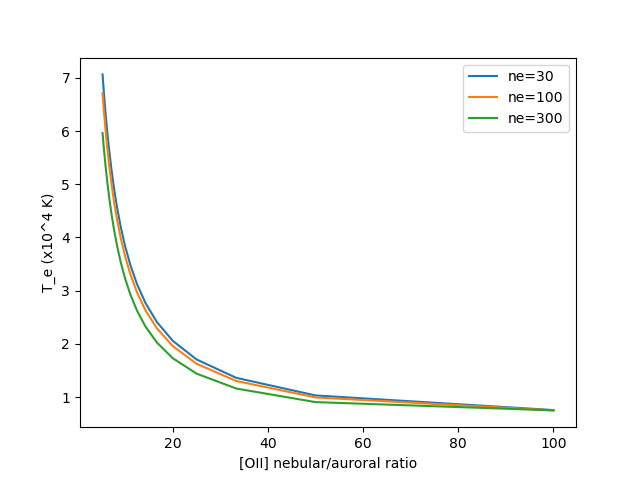

In [149]:
fig,ax=plt.subplots()
RO2 = 1/np.arange(0.01,0.2,0.01)
for ne in [30,100,300]:
    ax.plot(RO2,a0_n(ne) + (a1_n(ne) * RO2) + (a2_n(ne) / RO2),label=f'ne={ne}')
ax.legend()
ax.set_xlabel('[OII] nebular/auroral ratio')
ax.set_ylabel('T_e (x10^4 K)')

0    2.035866
1    2.025744
2    1.490097
3    1.607573
4    1.496354
5    1.566164
6    1.475703
7    1.421131
8    1.164199
Name: O2_7333_flux, dtype: float64
0    6.032553
1    6.031415
2    2.711804
3    3.318695
4    2.817777
5    3.106358
6    2.646942
7    2.466822
8    1.529461
Name: O2_3727_flux, dtype: float64
0    2.527945
1    2.545526
2    2.501283
3    2.526875
4    2.570392
5    2.526475
6    2.501462
7    2.569138
8    2.794887
dtype: float64


Text(0, 0.5, 'T_e (x10^4 K)')

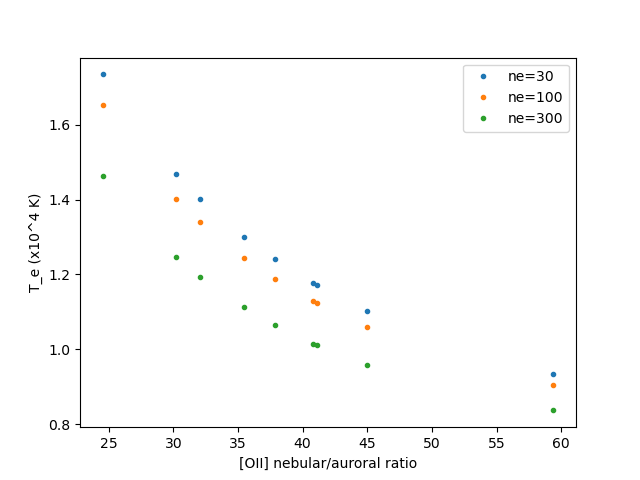

In [150]:
tm_old = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/magE2024_master_au.csv')
tm_new = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/magE2024_master_Dcorr.csv')
temden = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/ratios/temden_lines.csv')

print(tm_new['O2_7333_flux']/tm_old['O2_7333_flux'])
print(tm_new['O2_3727_flux']/tm_old['O2_3727_flux'])
# print(tm_new['O2_3727_flux']/tm_new2['O2_3727_flux'])
print(np.log(tm_new['O2_3727_flux']/tm_old['O2_3727_flux'])/np.log(tm_new['O2_7333_flux']/tm_old['O2_7333_flux']))


fig,ax=plt.subplots()
# RO2 = 1/np.arange(0.01,0.2,0.01)
RO2_meas = (tm_new['O2_3727_flux']+tm_new['O2_3725_flux'])/(tm_new['O2_7322_flux']+tm_new['O2_7333_flux'])
for ne in [30,100,300]:
    ax.plot(RO2_meas,a0_n(ne) + (a1_n(ne) * RO2_meas) + (a2_n(ne) / RO2_meas),'.',label=f'ne={ne}')
ax.legend()
ax.set_xlabel('[OII] nebular/auroral ratio')
ax.set_ylabel('T_e (x10^4 K)')

Text(0, 0.5, 'T_e (x10^4 K)')

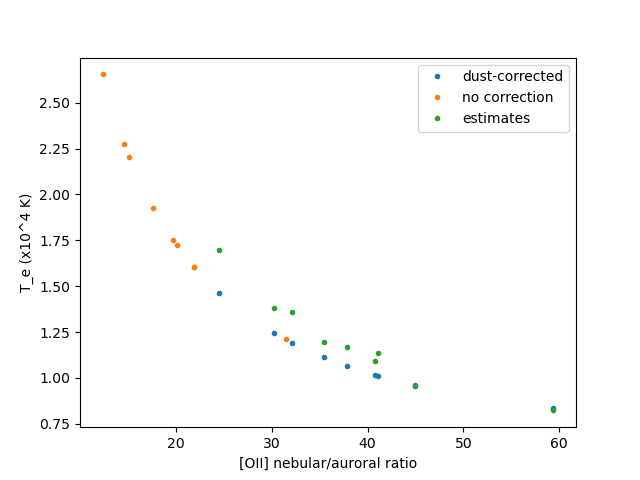

In [151]:
fig,ax=plt.subplots()
# RO2 = 1/np.arange(0.01,0.2,0.01)
RO2_corr = (tm_new['O2_3727_flux']+tm_new['O2_3725_flux'])/(tm_new['O2_7322_flux']+tm_new['O2_7333_flux'])
ax.plot(RO2_corr,a0_n(ne) + (a1_n(ne) * RO2_corr) + (a2_n(ne) / RO2_corr),'.',label=f'dust-corrected')
RO2_meas = (tm_old['O2_3727_flux']+tm_old['O2_3725_flux'])/(tm_old['O2_7322_flux']+tm_old['O2_7333_flux'])
ax.plot(RO2_meas,a0_n(ne) + (a1_n(ne) * RO2_meas) + (a2_n(ne) / RO2_meas),'.',label=f'no correction')

te_est = temden['tOII']
ax.plot(RO2_corr,te_est,'.',label=f'estimates')

ax.legend()
ax.set_xlabel('[OII] nebular/auroral ratio')
ax.set_ylabel('T_e (x10^4 K)')

In [152]:
temden

,Source,tOIII,tOIII_err,tNII,tNII_err,ne_OIII,ne_OIII_err,tOII,tOII_err,ne_OII,ne_OII_err,tOII_ne,tOII_ne_err,12_log_OH,12_log_OH_err,12_log_NH,12_log_NH_err,log_NO,log_NO_err
0,J0020,1.111476,0.025362,0.900241,0.055703,288.694003,10.292574,0.963785,0.017051,275.070002,9.621260,0.970832,0.016519,8.348110,0.023729,7.123332,0.019978,-1.010691,0.014530
1,J0203,1.147545,0.052294,0.928178,0.099501,341.611649,28.246223,0.823020,0.032435,302.191853,24.356087,0.835872,0.033503,8.436942,0.067249,7.407163,0.053013,-0.873506,0.038885
2,J0243,1.114783,0.017304,1.382683,0.193200,73.074597,19.694802,1.360595,0.066096,70.571493,21.155603,1.362740,0.064259,8.197935,0.020626,6.303103,0.042745,-0.991335,0.030221
3,J0033,1.159963,0.007688,1.944851,0.141191,126.770843,16.762068,1.379860,0.027713,127.609300,17.734430,1.378939,0.024267,8.172633,0.008501,6.249088,0.016189,-0.908403,0.011669
4,J2204,1.241180,0.024907,1.862867,0.296177,166.829711,29.556916,1.090140,0.061283,163.325122,28.121312,1.091983,0.059090,8.122166,0.042556,6.453156,0.058122,-1.300730,0.041979
5,J2258,1.334627,0.017441,1.238234,0.249063,58.755909,20.661634,1.696379,0.064131,54.716368,21.589649,1.701154,0.059916,7.966153,0.015025,6.038893,0.027860,-0.867077,0.019497
6,J2336,1.067953,0.016836,0.914149,0.081010,171.505892,19.179133,1.196573,0.032398,175.430414,20.131432,1.193921,0.029683,8.168712,0.019645,6.630351,0.024918,-0.890135,0.017866
7,J0023,1.415789,0.015750,0.965170,0.276962,134.156207,13.786051,1.166382,0.028037,133.048000,12.987911,1.167183,0.026692,7.955830,0.016358,6.051852,0.023578,-1.457091,0.017475
8,J0136,1.319523,0.017599,0.665387,0.449747,80.481378,34.415933,1.134953,0.072270,81.861839,32.584216,1.133819,0.069028,8.173351,0.023549,5.815853,0.066277,-1.613218,0.048149


Text(0, 0.5, 'T_e (x10^4 K)')

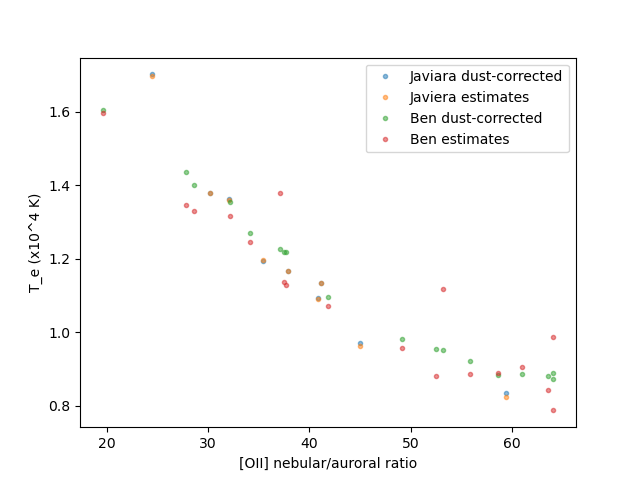

In [156]:
# fluxes_nava = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/analogs/results/em_lines_final.csv')
fluxes_nava = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/analogs/results/em_lines_lstsq.csv')

temden_nava = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/analogs/results/metals/temden_measured_final.csv')

fig,ax=plt.subplots()
# RO2 = 1/np.arange(0.01,0.2,0.01)
ne_javiera = temden['ne_OII']
RO2_corr = (tm_new['O2_3727_flux']+tm_new['O2_3725_flux'])/(tm_new['O2_7322_flux']+tm_new['O2_7333_flux'])
ax.plot(RO2_corr,a0_n(ne_javiera) + (a1_n(ne_javiera) * RO2_corr) + (a2_n(ne_javiera) / RO2_corr),'.',label=f'Javiara dust-corrected',alpha=0.5)
# RO2_meas = (tm_old['O2_3727_flux']+tm_old['O2_3725_flux'])/(tm_old['O2_7322_flux']+tm_old['O2_7333_flux'])
# ax.plot(RO2_meas,a0_n(ne) + (a1_n(ne) * RO2_meas) + (a2_n(ne) / RO2_meas),'.',label=f'no correction')
te_est = temden['tOII']
ax.plot(RO2_corr,te_est,'.',label=f'Javiera estimates',alpha=0.5)

RO2_nava = (fluxes_nava['[OII]3726']+fluxes_nava['[OII]3729'])/(fluxes_nava['[OII]7319']+fluxes_nava['[OII]7330'])
ne = temden_nava['ne']
ax.plot(RO2_nava,a0_n(ne) + (a1_n(ne) * RO2_nava) + (a2_n(ne) / RO2_nava),'.',label=f'Ben dust-corrected',alpha=0.5)
# RO2_meas = (tm_old['O2_3727_flux']+tm_old['O2_3725_flux'])/(tm_old['O2_7322_flux']+tm_old['O2_7333_flux'])
# ax.plot(RO2_meas,a0_n(ne) + (a1_n(ne) * RO2_meas) + (a2_n(ne) / RO2_meas),'.',label=f'no correction')
te_nava = temden_nava['tOII']
ax.plot(RO2_nava,te_nava,'.',label=f'Ben estimates',alpha=0.5)


ax.legend()
ax.set_xlabel('[OII] nebular/auroral ratio')
ax.set_ylabel('T_e (x10^4 K)')

In [154]:

new_nava= fluxes_nava[['galname','[OII]3726','[OII]3729','[OII]7319','[OII]7330']].copy()

for key in ['[OII]3726','[OII]3729','[OII]7319','[OII]7330']:
    new_nava[key] = new_nava[key]/1e-17

print(new_nava)
    

   galname    [OII]3726    [OII]3729   [OII]7319   [OII]7330
0    J0021  3821.116835  5863.264170  122.814415  108.609465
1    J0023  1399.606602  1920.215023   46.296078   43.177629
2    J0136   638.463797   860.326613   22.259466   17.767996
3    J0240  1129.344037  1056.703566   59.324741   52.187608
4    J0252   410.375066   623.788796   17.240292   13.065005
5    J0305   935.324598  1199.577514   18.683868   16.332044
6    J0950   920.382615  1091.560665   17.487731   13.929513
7    J1146    75.567483   110.061494    1.492667    1.431481
8    J1226  1124.235821  1375.400256   27.246443   23.598174
9    J1444   258.694848   336.078489   11.537983    9.272758
10   J1448  4778.370522  6454.965202  110.588172   90.666058
11   J1624   156.781196   186.736774    3.558878    2.904070
12   J2101  1371.164369  1792.525110   29.308209   30.933171
13   J2119  2074.624861  2774.654200   41.519181   34.184970
14   J2212   302.972925   391.694935    7.897814    3.948983
15   J2215   134.787250 

In [69]:
tm_new[['ID','O2_3725_flux','O2_3727_flux','O2_7322_flux','O2_7333_flux']]

,ID,O2_3725_flux,O2_3727_flux,O2_7322_flux,O2_7333_flux
0,J0020,1608.999248,1976.903314,46.172314,33.535081
1,J0203,503.221955,430.461755,8.129137,7.588537
2,J0243,625.076916,826.136389,24.504277,20.711437
3,J0033,979.409373,1286.295416,38.886916,36.063437
4,J2204,278.277038,567.897947,11.650403,9.078183
5,J2258,207.106392,271.718005,10.228697,9.296888
6,J2336,462.346875,543.611246,16.614393,11.753056
7,J0328,2369.927281,3276.649878,66.982512,69.852624
8,J0023,1387.810721,1552.414304,41.067871,36.550790
9,J0136,636.213429,783.016364,20.407301,14.099875
